<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/title.png' width=500/></center>

<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/practice3.png' width=300/></center>

# 소매점 판매 현황

<img src='https://raw.githubusercontent.com/Jangrae/img/master/retail.png' width="650" align="left">

가상으로 만들어진 2016년 2017년 소매점 판매 데이터

파일1: customers.csv
- CustomerID: 고객 코드
- RegisterDate : 가입일
- Address: 상세 주소
- Gender: 성별
- BirthYear: 출생연도
- Addr1: 시도
- Addr2: 구군

파일2: products.csv
- ProductID: 상품 코드
- ProductName: 상품 이름
- Category: 대분류
- SubCategory : 소분류
- CategoryOrd: 대분류 순서(의미없음)

파일3: orders.csv
- OrderID: 주문번호
- Seq: 일련 변호
- OrderDate: 주문일
- ProductID: 상품 코드
- Qty: 수량
- Amt : 금액
- CustomerID: 고객 코드

## 1.환경 설정

- 데이터 탐색과 전처리를 하기 전 필요한 라이브러리와 대상 파일을 읽어옵니다.
- 시각화에 한글이 포함될 경우 이에 대한 설정을 진행합니다.

**1) 한글 설정**

- Jupyter Notebook 시각화에 한글이 표시되게 설정합니다.

In [1]:
# 라이브러리 불러오기
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 폰트설정
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

**2) 라이브러리 불러오기**

- 사용할 라이브러리를 불러옵니다.

In [2]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'

**3) 데이터 읽어오기**

- 다음 경로의 파일을 읽어와 customers, products, orders 데이터프레임을 만듭니다.
- 파일 경로1: https://raw.githubusercontent.com/Jangrae/csv/master/customers.csv
- 파일 경로2: https://raw.githubusercontent.com/Jangrae/csv/master/products.csv
- 파일 경로3: https://raw.githubusercontent.com/Jangrae/csv/master/orders.csv

In [3]:
path_c = 'https://raw.githubusercontent.com/Jangrae/csv/master/customers.csv'
customers = pd.read_csv(path_c)
customers.head()

,CustomerID,RegisterDate,Address,Gender,BirthYear,Addr1,Addr2
0,c017487,2002-07-31,경기 성남시 중원구 둔촌대로190번길,F,1968,경기도,성남시
1,c017503,2002-07-31,서울 마포구 새터산12길,F,1971,서울특별시,마포구
2,c017517,2002-07-31,경기도 남양주시 와부읍 덕소로,M,1967,경기도,남양주시
3,c017522,2002-07-31,강원도 원주시 단구로,F,1965,강원도,원주시
4,c017526,2002-07-31,경기도 부천시 오정구 소사로730번길,F,1960,경기도,부천시


In [4]:
path_p = 'https://raw.githubusercontent.com/Jangrae/csv/master/products.csv'
products = pd.read_csv(path_p)
products.head()

,ProductID,ProductName,Category,SubCategory,CategoryOrd
0,p1001771,마늘,채소,뿌리채소,5
1,p1002841,딸기_대,과일,과채,2
2,p1005621,숙주나물,반찬류,나물류,1
3,p1005771,두부_소,반찬류,두부,1
4,p1005891,두부_대,반찬류,두부,1


In [5]:
path_o = 'https://raw.githubusercontent.com/Jangrae/csv/master/orders.csv'
orders = pd.read_csv(path_o)
orders.head()

,OrderID,Seq,OrderDate,ProductID,Qty,Amt,CustomerID
0,1,1,2016-01-02,p1030071,2,7900,c107853
1,2,1,2016-01-02,p1012761,1,1700,c110521
2,2,2,2016-01-02,p1012581,1,1000,c110521
3,2,3,2016-01-02,p1175481,1,1300,c110521
4,2,4,2016-01-02,p1178011,1,8800,c110521


## 2.데이터 탐색

다음과 같은 정보 확인을 통해 처리할 대상 데이터를 이해합니다.
- 상/하위 데이터 확인
- 데이터프레임 크기 확인
- 열 이름, 데이터 형식, 값 개수 등 확인
- 기초 통계정보 확인
- 결측치 확인
- 범주형 데이터 확인
- 개별 열 값 상세 확인 등

**1) 고객 정보(customers)**

- customers 데이터프레임을 충분히 탐색합니다.
- 간단한 집계를 수행해 보는 것도 좋은 방법입니다.

In [6]:
customers.head()

,CustomerID,RegisterDate,Address,Gender,BirthYear,Addr1,Addr2
0,c017487,2002-07-31,경기 성남시 중원구 둔촌대로190번길,F,1968,경기도,성남시
1,c017503,2002-07-31,서울 마포구 새터산12길,F,1971,서울특별시,마포구
2,c017517,2002-07-31,경기도 남양주시 와부읍 덕소로,M,1967,경기도,남양주시
3,c017522,2002-07-31,강원도 원주시 단구로,F,1965,강원도,원주시
4,c017526,2002-07-31,경기도 부천시 오정구 소사로730번길,F,1960,경기도,부천시


In [7]:
customers.tail()

,CustomerID,RegisterDate,Address,Gender,BirthYear,Addr1,Addr2
2238,c400937,2017-03-12,인천광역시 계양구 주부토로,F,1980,인천광역시,계양구
2239,c401555,2017-03-20,경기도 남양주시 별내면 청학로68번길,F,1981,경기도,남양주시
2240,c401584,2017-03-20,경기도 성남시 분당구 불정로,F,1979,경기도,성남시
2241,c402010,2017-03-25,경기도 성남시 분당구 판교원로82번길,F,1969,경기도,성남시
2242,c402634,2017-03-30,경기도 용인시 수지구 죽전로,F,1960,경기도,용인시


In [8]:
customers.shape

(2243, 7)

In [9]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2243 entries, 0 to 2242
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    2243 non-null   object
 1   RegisterDate  2243 non-null   object
 2   Address       2243 non-null   object
 3   Gender        2243 non-null   object
 4   BirthYear     2243 non-null   int64 
 5   Addr1         2243 non-null   object
 6   Addr2         2243 non-null   object
dtypes: int64(1), object(6)
memory usage: 122.8+ KB


In [10]:
customers.describe()

,BirthYear
count,2243.000000
mean,1971.107445
std,9.658465
min,1932.000000
25%,1966.000000
50%,1972.000000
75%,1978.000000
max,1999.000000


In [11]:
customers.isna().sum()

CustomerID      0
RegisterDate    0
Address         0
Gender          0
BirthYear       0
Addr1           0
Addr2           0
dtype: int64

In [12]:
customers.value_counts()

CustomerID  RegisterDate  Address               Gender  BirthYear  Addr1  Addr2
c017487     2002-07-31    경기 성남시 중원구 둔촌대로190번길  F       1968       경기도    성남시      1
c306719     2014-01-26    서울특별시 은평구 연서로         F       1969       서울특별시  은평구      1
c305895     2014-01-14    경기도 의왕시 갈미1로          F       1979       경기도    의왕시      1
c305921     2014-01-14    서울특별시 강서구 화곡로13길      F       1977       서울특별시  강서구      1
c306199     2014-01-17    경기도 고양시 일산동구 애니골길     F       1977       경기도    고양시      1
                                                                                  ..
c149838     2010-02-22    경기도 의왕시 갈미1로          F       1970       경기도    의왕시      1
c149615     2010-02-19    서울특별시 종로구  옥인길        F       1979       서울특별시  종로구      1
c149399     2010-02-16    경기도 안성시 삼죽면 삼백로       F       1973       경기도    안성시      1
c148979     2010-02-08    경기도 김포시 청송로           F       1955       경기도    김포시      1
c402634     2017-03-30    경기도 용인시 수지구 죽전로       F       1960       경기도

**2) 상품 정보(products)**

- products 데이터프레임을 충분히 탐색합니다.
- 간단한 집계를 수행해 보는 것도 좋은 방법입니다.

In [13]:
products.head()

,ProductID,ProductName,Category,SubCategory,CategoryOrd
0,p1001771,마늘,채소,뿌리채소,5
1,p1002841,딸기_대,과일,과채,2
2,p1005621,숙주나물,반찬류,나물류,1
3,p1005771,두부_소,반찬류,두부,1
4,p1005891,두부_대,반찬류,두부,1


In [14]:
products.tail()

,ProductID,ProductName,Category,SubCategory,CategoryOrd
57,p1246581,초코우유,유제품,우유,4
58,p1255281,딸기요거트,유제품,요거트,4
59,p1256521,부침용두부,반찬류,두부,1
60,p1284851,유기농우유,유제품,우유,4
61,p1299491,당근,채소,뿌리채소,5


In [15]:
products.shape

(62, 5)

In [16]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ProductID    62 non-null     object
 1   ProductName  62 non-null     object
 2   Category     62 non-null     object
 3   SubCategory  62 non-null     object
 4   CategoryOrd  62 non-null     int64 
dtypes: int64(1), object(4)
memory usage: 2.5+ KB


In [17]:
products.describe()

,CategoryOrd
count,62.000000
mean,3.612903
std,1.406715
min,1.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,5.000000


In [18]:
products.isna().sum()

ProductID      0
ProductName    0
Category       0
SubCategory    0
CategoryOrd    0
dtype: int64

In [19]:
products.value_counts()

ProductID  ProductName  Category  SubCategory  CategoryOrd
p1001771   마늘           채소        뿌리채소         5              1
p1194801   딸기_소         과일        과채           2              1
p1144371   청오이          채소        열매채소         5              1
p1144661   양배출          채소        잎채소          5              1
p1149381   팥아이스크림       유제품       아이스크림        4              1
                                                             ..
p1097821   짱구           간식        과자           3              1
p1097831   감자칩          간식        과자           3              1
p1100371   연두부          반찬류       두부           1              1
p1119071   뿌셔뿌셔         간식        과자           3              1
p1299491   당근           채소        뿌리채소         5              1
Length: 62, dtype: int64

**3) 주문 정보(orders)**

- orders 데이터프레임을 충분히 탐색합니다.
- 간단한 집계를 수행해 보는 것도 좋은 방법입니다.

In [20]:
orders.head()

,OrderID,Seq,OrderDate,ProductID,Qty,Amt,CustomerID
0,1,1,2016-01-02,p1030071,2,7900,c107853
1,2,1,2016-01-02,p1012761,1,1700,c110521
2,2,2,2016-01-02,p1012581,1,1000,c110521
3,2,3,2016-01-02,p1175481,1,1300,c110521
4,2,4,2016-01-02,p1178011,1,8800,c110521


In [21]:
orders.tail()

,OrderID,Seq,OrderDate,ProductID,Qty,Amt,CustomerID
68834,76,1,2017-03-31,p1201601,1,2100,c302834
68835,77,1,2017-03-31,p1002841,1,10700,c343734
68836,78,1,2017-03-31,p1012761,1,1900,c354639
68837,79,1,2017-03-31,p1005891,1,1950,c394131
68838,79,2,2017-03-31,p1179241,1,2200,c394131


In [22]:
orders.shape

(68839, 7)

In [23]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68839 entries, 0 to 68838
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   OrderID     68839 non-null  int64 
 1   Seq         68839 non-null  int64 
 2   OrderDate   68839 non-null  object
 3   ProductID   68839 non-null  object
 4   Qty         68839 non-null  int64 
 5   Amt         68839 non-null  int64 
 6   CustomerID  68839 non-null  object
dtypes: int64(4), object(3)
memory usage: 3.7+ MB


In [24]:
orders.describe()

,OrderID,Seq,Qty,Amt
count,68839.000000,68839.000000,68839.000000,68839.000000
mean,38.551519,2.082628,1.266985,2847.057990
std,23.952370,1.469644,1.372289,2634.378327
min,1.000000,1.000000,1.000000,250.000000
25%,18.000000,1.000000,1.000000,1300.000000
50%,37.000000,2.000000,1.000000,1950.000000
75%,56.000000,3.000000,1.000000,3227.000000
max,122.000000,15.000000,200.000000,109100.000000


In [25]:
orders.isna().sum()

OrderID       0
Seq           0
OrderDate     0
ProductID     0
Qty           0
Amt           0
CustomerID    0
dtype: int64

In [26]:
orders.value_counts()

OrderID  Seq  OrderDate   ProductID  Qty  Amt    CustomerID
1        1    2016-01-02  p1030071   2    7900   c107853       1
49       2    2017-02-22  p1002841   2    26200  c274126       1
              2017-01-16  p1179241   1    2050   c092647       1
              2017-01-18  p1013251   1    3200   c177887       1
              2017-01-20  p1097821   4    3636   c038272       1
                                                              ..
25       1    2016-03-13  p1005771   1    1850   c168775       1
              2016-03-14  p1052661   2    2910   c324337       1
              2016-03-15  p1178011   1    8800   c140393       1
              2016-03-16  p1194801   1    6800   c347991       1
122      1    2016-02-06  p1133371   1    1000   c366727       1
Length: 68839, dtype: int64

## 3.데이터 전처리

전처리 과정에서 다음과 같은 처리를 할 수 있습니다.

- 결측치 처리
- 값 변경
- 열 추가
- 불필요한 열 제거
- 열 이름 변경
- 데이터 통합(연결 또는 조인)
- 가변수화 등

**1) 데이터 통합**

- 각 데이터프레임의 모든 열을 통합 할 것이 아니면 
    - 필요한 열만 추출해 별도 데이터프레임을 선언한 후 통합하거나
    - 또는 모두 통합 후 불필요한 열을 제거하는 방법을 사용합니다.

In [27]:
# orders와 customers를 'CustomerID' 기준으로 병합
sale = pd.merge(orders, customers, on='CustomerID', how='inner')
sale.head()

,OrderID,Seq,OrderDate,ProductID,Qty,Amt,CustomerID,RegisterDate,Address,Gender,BirthYear,Addr1,Addr2
0,1,1,2016-01-02,p1030071,2,7900,c107853,2008-07-11,경기도 안성시 비룡2길,M,1961,경기도,안성시
1,48,1,2016-01-09,p1097821,3,3000,c107853,2008-07-11,경기도 안성시 비룡2길,M,1961,경기도,안성시
2,48,2,2016-01-09,p1012951,2,6000,c107853,2008-07-11,경기도 안성시 비룡2길,M,1961,경기도,안성시
3,48,3,2016-01-09,p1012811,2,5000,c107853,2008-07-11,경기도 안성시 비룡2길,M,1961,경기도,안성시
4,48,4,2016-01-09,p1005771,1,1850,c107853,2008-07-11,경기도 안성시 비룡2길,M,1961,경기도,안성시


In [28]:
# 위에서 병합한 sales와 products를 'ProductID' 기준으로 병합
sales = pd.merge(sale, products, on='ProductID', how='inner')
sales.head()

,OrderID,Seq,OrderDate,ProductID,Qty,Amt,CustomerID,RegisterDate,Address,Gender,BirthYear,Addr1,Addr2,ProductName,Category,SubCategory,CategoryOrd
0,1,1,2016-01-02,p1030071,2,7900,c107853,2008-07-11,경기도 안성시 비룡2길,M,1961,경기도,안성시,토마토,과일,과채,2
1,17,1,2016-05-05,p1030071,2,8200,c110521,2008-09-04,경기도 안산시 단원구 광덕서로,F,1972,경기도,안산시,토마토,과일,과채,2
2,11,1,2017-03-12,p1030071,2,9600,c110521,2008-09-04,경기도 안산시 단원구 광덕서로,F,1972,경기도,안산시,토마토,과일,과채,2
3,56,1,2016-11-05,p1030071,1,4700,c256672,2012-09-13,서울특별시 구로구 공원로6가길,F,1980,서울특별시,구로구,토마토,과일,과채,2
4,32,1,2016-02-13,p1030071,1,4650,c260294,2012-10-22,서울특별시 마포구 잔다리로,F,1980,서울특별시,마포구,토마토,과일,과채,2


**2) 결과 확인**

In [29]:
sales.head(10)

,OrderID,Seq,OrderDate,ProductID,Qty,Amt,CustomerID,RegisterDate,Address,Gender,BirthYear,Addr1,Addr2,ProductName,Category,SubCategory,CategoryOrd
0,1,1,2016-01-02,p1030071,2,7900,c107853,2008-07-11,경기도 안성시 비룡2길,M,1961,경기도,안성시,토마토,과일,과채,2
1,17,1,2016-05-05,p1030071,2,8200,c110521,2008-09-04,경기도 안산시 단원구 광덕서로,F,1972,경기도,안산시,토마토,과일,과채,2
2,11,1,2017-03-12,p1030071,2,9600,c110521,2008-09-04,경기도 안산시 단원구 광덕서로,F,1972,경기도,안산시,토마토,과일,과채,2
3,56,1,2016-11-05,p1030071,1,4700,c256672,2012-09-13,서울특별시 구로구 공원로6가길,F,1980,서울특별시,구로구,토마토,과일,과채,2
4,32,1,2016-02-13,p1030071,1,4650,c260294,2012-10-22,서울특별시 마포구 잔다리로,F,1980,서울특별시,마포구,토마토,과일,과채,2
5,52,3,2016-09-24,p1030071,1,3300,c260294,2012-10-22,서울특별시 마포구 잔다리로,F,1980,서울특별시,마포구,토마토,과일,과채,2
6,17,2,2017-03-26,p1030071,1,4800,c260294,2012-10-22,서울특별시 마포구 잔다리로,F,1980,서울특별시,마포구,토마토,과일,과채,2
7,71,3,2016-08-18,p1030071,1,2250,c275598,2013-04-22,서울특별시 종로구 옥인5길,F,1979,서울특별시,종로구,토마토,과일,과채,2
8,38,3,2017-03-14,p1030071,1,4800,c337999,2015-01-12,인천광역시 계양구 계양산로42번길,F,1977,인천광역시,계양구,토마토,과일,과채,2
9,57,2,2016-02-13,p1030071,1,4650,c350776,2015-06-06,경기도 안산시 상록구 반석로,F,1983,경기도,안산시,토마토,과일,과채,2


**3) 열 추가**

- 분석을 위해 필요한 열을 추가합니다.
- 예를 들어 다음과 같은 열들이 필요하다고 판단할 수 있습니다.
    - OrderYear: 주문연도, 주문연도별 분석이 용이하게 하기 위함
    - OrderMonth: 주문월, 주문년월 분석이 용이하게 하기 위함
    - Age: 연령별 분석을 하기 위함(2017 - 출생년도) 등등

In [30]:
sales['OrderYear'] = pd.to_datetime(sales['OrderDate']).dt.year
sales['OrderMonth'] = pd.to_datetime(sales['OrderDate']).dt.month
sales['OrderWeekDay'] = pd.to_datetime(sales['OrderDate']).dt.weekday
sales['Age'] = 2017 - sales['BirthYear']
sales.head()

,OrderID,Seq,OrderDate,ProductID,Qty,Amt,CustomerID,RegisterDate,Address,Gender,...,Addr1,Addr2,ProductName,Category,SubCategory,CategoryOrd,OrderYear,OrderMonth,OrderWeekDay,Age
0,1,1,2016-01-02,p1030071,2,7900,c107853,2008-07-11,경기도 안성시 비룡2길,M,...,경기도,안성시,토마토,과일,과채,2,2016,1,5,56
1,17,1,2016-05-05,p1030071,2,8200,c110521,2008-09-04,경기도 안산시 단원구 광덕서로,F,...,경기도,안산시,토마토,과일,과채,2,2016,5,3,45
2,11,1,2017-03-12,p1030071,2,9600,c110521,2008-09-04,경기도 안산시 단원구 광덕서로,F,...,경기도,안산시,토마토,과일,과채,2,2017,3,6,45
3,56,1,2016-11-05,p1030071,1,4700,c256672,2012-09-13,서울특별시 구로구 공원로6가길,F,...,서울특별시,구로구,토마토,과일,과채,2,2016,11,5,37
4,32,1,2016-02-13,p1030071,1,4650,c260294,2012-10-22,서울특별시 마포구 잔다리로,F,...,서울특별시,마포구,토마토,과일,과채,2,2016,2,5,37


**4) 불필요한 열 제거**

- 분석에 필요가 없다고 생각되는 열은 제거합니다.
- 새로운 열을 추가하면 기존 열이 필요하지 않을 수 있습니다.
- 예를 들어 다음 열들이 필요하지 않다고 판단할 수 있습니다.
    - OrderDate: 새로 추가한 OrderYear, OrderMonth 열 사용
    - ProductID: ProductName 열 사용
    - SubCategory: 분석 대상에서 제외 등등

In [31]:
col_x = ['OrderDate', 'ProductID', 'CategoryOrd', 'Address']
sales_an = sales.drop(col_x, axis=1, inplace=False)
sales_an.head()

,OrderID,Seq,Qty,Amt,CustomerID,RegisterDate,Gender,BirthYear,Addr1,Addr2,ProductName,Category,SubCategory,OrderYear,OrderMonth,OrderWeekDay,Age
0,1,1,2,7900,c107853,2008-07-11,M,1961,경기도,안성시,토마토,과일,과채,2016,1,5,56
1,17,1,2,8200,c110521,2008-09-04,F,1972,경기도,안산시,토마토,과일,과채,2016,5,3,45
2,11,1,2,9600,c110521,2008-09-04,F,1972,경기도,안산시,토마토,과일,과채,2017,3,6,45
3,56,1,1,4700,c256672,2012-09-13,F,1980,서울특별시,구로구,토마토,과일,과채,2016,11,5,37
4,32,1,1,4650,c260294,2012-10-22,F,1980,서울특별시,마포구,토마토,과일,과채,2016,2,5,37


In [32]:
sales_an.rename(columns = {'Addr1': '시도', 'Addr2':'구군'}, inplace=True)
sales_an.head()

,OrderID,Seq,Qty,Amt,CustomerID,RegisterDate,Gender,BirthYear,시도,구군,ProductName,Category,SubCategory,OrderYear,OrderMonth,OrderWeekDay,Age
0,1,1,2,7900,c107853,2008-07-11,M,1961,경기도,안성시,토마토,과일,과채,2016,1,5,56
1,17,1,2,8200,c110521,2008-09-04,F,1972,경기도,안산시,토마토,과일,과채,2016,5,3,45
2,11,1,2,9600,c110521,2008-09-04,F,1972,경기도,안산시,토마토,과일,과채,2017,3,6,45
3,56,1,1,4700,c256672,2012-09-13,F,1980,서울특별시,구로구,토마토,과일,과채,2016,11,5,37
4,32,1,1,4650,c260294,2012-10-22,F,1980,서울특별시,마포구,토마토,과일,과채,2016,2,5,37


## 4.데이터 분석

- 현재 판매 현황을 분석해 향후 판매 전략 수립에 중요한 정보로 활용할 것입니다.
- 데이터를 집계하고 간단히 시각화하여 판매 현황을 분석합니다.
- 연속형 값은 선 그래프, 범주형 값은 막대 그래프로 시각화함이 일반적입니다.

**1) 남녀별 판매 현황**

- 남녀별 판매 현황을 막대 그래프로 시각화해 확인합니다.

In [ ]:
# 남녀별 구매금액 집계
tmp0 = sales_an.groupby(by='Gender', as_index=False)[['Amt']].sum()

#시각화
plt.bar(tmp0['Gender'], tmp0['Amt']/10000)
plt.ylabel('구매금액[만원]')
plt.show()

In [ ]:
# 성별별 + 카테고리별 집계
tmp_01 = sales_an.groupby(by=['Gender', 'Category'], as_index = False)[['Qty', 'Amt']].sum()
tmp_01

In [ ]:
#시각화
plt.bar(tmp_01['Category'], tmp_01['Qty'])
plt.ylabel('구매량')
plt.show()

**2) 지역별 판매 현황**

- 지역별 판매 현황을 막대 그래프로 시각화해 확인합니다.

In [ ]:
# 시도, 구군별 구매량, 구매금액 집계
tmp_ad = sales_an.groupby(by=['시도', '구군'], as_index = False)[['Qty', 'Amt']].sum()
tmp_ad

In [ ]:
# 시도별 구매량 시각화
plt.figure(figsize=(10,5))
plt.bar(tmp_ad['시도'], tmp_ad['Qty'])
plt.ylabel('구매량')
plt.xticks(rotation=50)
plt.show()

In [ ]:
# 시도별 구매금액 시각화
plt.figure(figsize=(10,5))
plt.bar(tmp_ad['시도'], tmp_ad['Amt']/10000)
plt.ylabel('구매금액[만원]')
plt.xticks(rotation=50)
plt.show()

In [ ]:
tmp_ad_Qty_top25 = tmp_ad.sort_values(by='Qty', ascending=False).head(25)

# 시각화
plt.figure(figsize=(10,5))
plt.bar(tmp_ad_Qty_top25['구군'], tmp_ad_Qty_top25['Qty'])
plt.ylabel('구매량')
plt.xticks(rotation=50)
plt.show()

In [ ]:
tmp_ad_Amt_top25 = tmp_ad.sort_values(by='Amt', ascending=False).head(25)

# 시각화
plt.figure(figsize=(10,5))
plt.bar(tmp_ad_Amt_top25['구군'], tmp_ad_Amt_top25['Amt']/10000)
plt.ylabel('구매금액[만원]')
plt.xticks(rotation=50)
plt.show()

**3) 추가**

In [ ]:
# 연령대 column 생성
sales_an['AgeC'] = (sales_an['Age']//10).astype(str) + '0대'
# sales_an.head()

# 연령별 카테고리 집계
tmp_age = sales_an.groupby(by=['AgeC', 'Category'], as_index = False)[['Qty', 'Amt']].sum()
tmp_age.head()

In [ ]:
# 연령대별 구매량 시각화
plt.figure(figsize=(10,5))
plt.bar(tmp_age['AgeC'], tmp_age['Qty'])
plt.ylabel('구매량')
plt.xticks(rotation=50)
plt.show()

In [ ]:
# 연령대별 구매금액 시각화
plt.figure(figsize=(10,5))
plt.bar(tmp_age['AgeC'], tmp_age['Amt']/10000)
plt.ylabel('구매금액[만원]')
plt.xticks(rotation=50)
plt.show()

**4) 추가**

In [ ]:
# 구매량이 가장 많은 40대 카테고리별 구매 현황 집계
tmp_age40 = tmp_age.loc[tmp_age['AgeC']=='40대', :]
tmp_age40 = tmp_age40.sort_values(by='Qty', ascending=False)

# 구매량이 가장 많은 40대 카테고리별 구매량 시각화
plt.figure(figsize=(10,5))
plt.bar(tmp_age40['Category'], tmp_age40['Qty'])
plt.ylabel('구매량')
plt.xticks(rotation=50)
plt.show()

**5) 추가**

## 5.고객 분류

* 고객을 등급을 나눠 판매 현황을 분석하고 이에 따른 판매 전략을 수립하려합니다.
- 우선 고객을 일정 기준에 따라 분류하고 등급을 지정해야 합니다.
- 다음과 같은 순서로 처리하면 될 것입니다.
    - 고객별 주문 수량 합, 판매 금액 합을 갖는 데이터프레임 선언
    - 고객 분류 기준과 이 기준에 따른 등급 이름 정의
    - 고객 등급을 갖는 새로운 Level 열 추가

**1) 고객별 집계**

* 고객별 주문 수량 합, 판매 금액 합을 갖는 cst 데이터프레임을 선언합니다.

In [18]:
sum_custm = sales_an.groupby(by='CustomerID', as_index = False)[['Qty', 'Amt']].sum()
sum_custm.head()

,CustomerID,Qty,Amt
0,c017487,127,296447
1,c017503,42,160444
2,c017517,192,317590
3,c017522,64,219849
4,c017526,26,48881


**2) 고객 분류 기준 찾기**

- 고객 등급 분류 기준을 찾기 위해 관련 데이터를 확인합니다.

In [ ]:
sum_custm.describe().apply(lambda x: x.apply('{:,.4f}'.format))

**3) 고객 분류 기준 정리**

- 고객 등급 분류 기준과 그 기준에 따른 등급 이름을 정리합니다.
- 예를 들면 다음과 같은 기준과 등급 이름을 정의할 수 있을 것입니다.
    - ~ 30,000: Family
    - 30,000 ~ 100,000: Bronze
    - 100,000 ~ 300,000: Silver
    - 300,000 ~ : Gold
    - 600,000 ~ : Platinum
    
- 분류 기준과 등급 이름
    - ~ 30,000: Family
    - 30,000 ~ 100,000: Bronze
    - 100,000 ~ 400,000: Silver
    - 400,000 ~ 1,000,000: Gold
    - 1,000,000 ~ : Platinum

**4) 고객 등급 반영**

- 각자 정의한 기준에 따라 고객 등급을 Level 열로 저장합니다.

In [ ]:
# 등급 구하기
my_bin = [-np.inf, 30000, 100000, 400000, 1000000, np.inf] 
label = ['Family', 'Bronze', 'Silver', 'Gold', 'Platinum']
sum_custm['grade'] = pd.cut(sum_custm['Amt'], bins = my_bin, labels = label)

sum_custm.head()

In [ ]:
sum_custm.info()

- 등급별 고객 수를 확인해 등급이 적절히 나뉘었는지 검증합니다.
- 검증 결과가 적절하지 않다면 위 기준을 변경해 등급을 다시 나눕니다.

In [ ]:
# 확인
sum_custm['grade'].value_counts()

In [19]:
# 주어진 예시대로 나누어보기
# 등급 구하기
my_bin = [-np.inf, 30000, 100000, 300000, 600000, np.inf] 
label = ['Family', 'Bronze', 'Silver', 'Gold', 'Platinum']
sum_custm['grade_ex'] = pd.cut(sum_custm['Amt'], bins = my_bin, labels = label)

sum_custm['grade_ex'].value_counts()

Family      1113
Bronze       556
Silver       392
Gold         143
Platinum      33
Name: grade_ex, dtype: int64

## 6.등급별 고객 분석

- 고객 등급을 기준으로 다양한 분석을 진행합니다.
- 등급 별 분석은 판매 전략을 새롭게 수립하는 데 중요한 자료가 될 것입니다.
- 분석 과정에서 판매 전략에 대한 부분을 고민해 보시기 바랍니다.

**1) 등급별 판매 수량**

- 고객 등급별 판매 수량을 막대 그래프로 시각화해 확인합니다.

In [ ]:
sum_custm_qty = sum_custm.sort_values(by='Qty', ascending=False)

plt.figure(figsize=(10,5))
plt.bar(sum_custm_qty['grade_ex'], sum_custm_qty['Qty'])
plt.ylabel('구매량')
# plt.xticks(rotation=50)
plt.show()

**2) 등급별 판매 금액**

- 고객 등급별 판매 금액을 막대 그래프로 시각화해 확인합니다. 

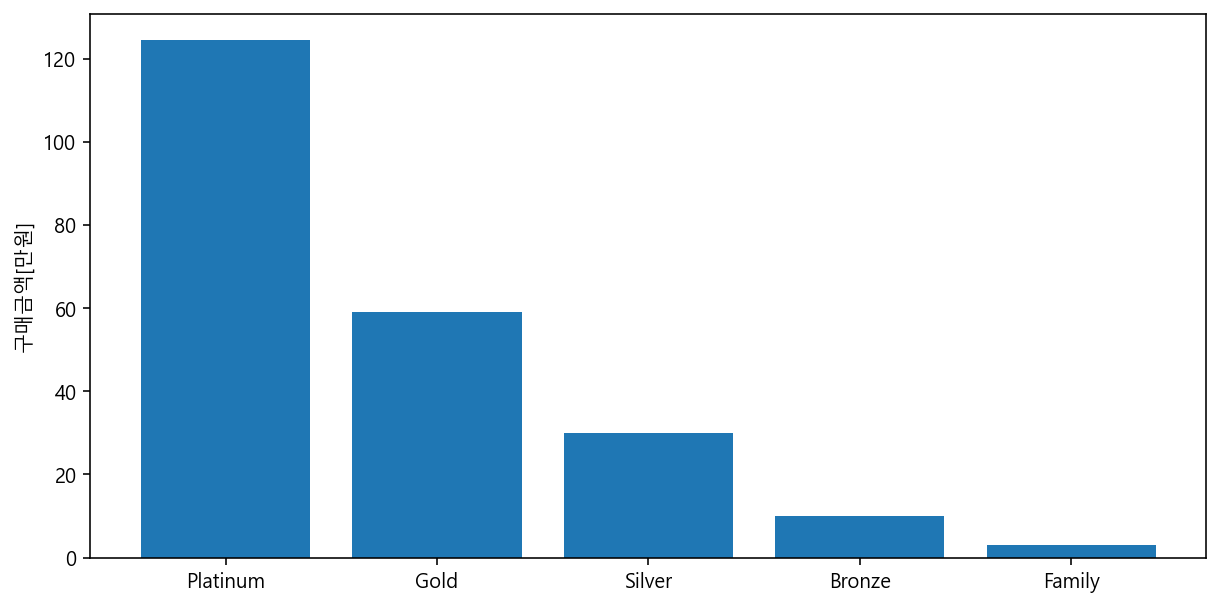

In [20]:
sum_custm_amt = sum_custm.sort_values(by='Amt', ascending=False)

plt.figure(figsize=(10,5))
plt.bar(sum_custm_amt['grade_ex'], sum_custm_amt['Amt']/10000)
plt.ylabel('구매금액[만원]')
# plt.xticks(rotation=50)
plt.show()

**3) 추가**

In [ ]:
# 등급별 카테고리별 구매 현황 집계
sum_custm1 = sum_custm[['CustomerID','grade_ex']]
#구매내역에 등급열 추가
sales_anc = pd.merge(sales_an, sum_custm1, on='CustomerID', how='inner')
sales_anc.head()

tmp_grd = sales_anc.groupby(by=['grade_ex', 'Category'], as_index = False)[['Qty', 'Amt']].sum()
tmp_grd.head()

**4) 추가**

In [ ]:
#플래티넘 등급의 카테고리별 구매량 시각화

tmp_grd_Pl = tmp_grd.loc[tmp_grd['grade_ex']=='Platinum', :]
tmp_grd_Pl = tmp_grd_Pl.sort_values(by='Qty', ascending=False)

plt.figure(figsize=(10,5))
plt.bar(tmp_grd_Pl['Category'], tmp_grd_Pl['Qty'])
plt.ylabel('구매량')
# plt.xticks(rotation=50)
plt.show()

**5) 추가**

In [ ]:
#패밀리 등급의 카테고리별 구매량 시각화

tmp_grd_Fa = tmp_grd.loc[tmp_grd['grade_ex']=='Family', :]
tmp_grd_Fa = tmp_grd_Fa.sort_values(by='Qty', ascending=False)

plt.figure(figsize=(10,5))
plt.bar(tmp_grd_Fa['Category'], tmp_grd_Fa['Qty'])
plt.ylabel('구매량')
# plt.xticks(rotation=50)
plt.show()

## 7.비즈니스 제안

- 위 진행된 내용을 기반으로 판매 향상 등을 위한 비즈니스 제안을 합니다.

- 등급별 카테고리 구매내역 분석 결과 많이 구매하는 내역이 다르므로 등급별 제품혜택을 다르게 적용하면 판매량을 높일 수 있을 것
- 실제 플래티넘 등급은 유제품, 채소가 많은 반면 패밀리 등급은 반찬류를 많이 구매하고 있음
- 구매 패턴 분석을 통해 많이 사는 제품에 대한 추천, 혜택 제공등의 서비스를 통해 매출을 더욱 높일 수 있을 것으로 기대

## 8.정리

- 분석을 통해 확인한 내용을 정리합니다.

**1) 의견**






- Platinum 등급은 가장 적으나 구매량과 구매금액에 월등히 높다
- 구매량, 구매금액은 등급별 회원수와는 정반대의 모습을 보인다
- 
- 

**2) 기타**

- 
- 
- 
- 
- 

In [ ]:
sum_month = sales.groupby(by='OrderMonth', as_index = False)[['Qty', 'Amt']].sum()
# sum_month

plt.figure(figsize=(10,5))
plt.bar(sum_month['OrderMonth'], sum_month['Qty'])
plt.ylabel('구매량')
# plt.xticks(rotation=50)
plt.show()

In [ ]:

sum_wd = sales.groupby(by='OrderWeekDay', as_index = False)[['Qty', 'Amt']].sum()
sum_wd['OrderWeekDay']=sum_wd['OrderWeekDay'].map({0:'월', 1:'화', 2:'수', 3:'목', 4:'금', 5:'토', 6:'일'})
# sum_wd.rename(columns = {0:'월', 1:'화', 2:'수', 3:'목', 4:'금', 5:'토', 6:'일'})
# sum_month

plt.figure(figsize=(10,5))
plt.bar(sum_wd['OrderWeekDay'], sum_wd['Qty'])
plt.ylabel('구매량')
# plt.xticks(rotation=50)
plt.show()